                                Arbol de Decisión en Python: Clasificación y predicción.
             

Los arboles de decisión son representaciones gráficas de posibles soluciones a una decisión basadas en ciertas condiciones, es uno de los algoritmos de aprendizaje supervisado más utilizados en machine learning y pueden realizar tareas de clasificación o regresión (acrónimo del inglés CART). La comprensión de su funcionamiento suele ser simple y a la vez muy potente.

Utilizamos mentalmente estructuras de árbol de decisión constantemente en nuestra vida diaria sin darnos cuenta:

¿Llueve? => lleva paraguas. ¿Soleado? => lleva gafas de sol. ¿estoy cansado? => toma café. (decisiones del tipo IF THIS THEN THAT)

Los árboles de decisión tienen un primer nodo llamado raíz (root) y luego se descomponen el resto de atributos de entrada en dos ramas (podrían ser más, pero no nos meteremos en eso ahora) planteando una condición que puede ser cierta o falsa. Se bifurca cada nodo en 2 y vuelven a subdividirse hasta llegar a las hojas que son los nodos finales y que equivalen a respuestas a la solución: Si/No, Comprar/Vender, o lo que sea que estemos clasificando.

Otro ejemplo son los populares juegos de adivinanza:

1 ¿Animal ó vegetal? -Animal
2 ¿Tiene cuatro patas? -Si
3 ¿Hace guau? -Si
4 -> Es un perro!

####                              ¿Qué necesidad hay de usar el Algoritmo de Arbol?
                              
Supongamos que tenemos atributos como Género con valores “hombre ó mujer” y edad en rangos: “menor de 18 ó mayor de 18” para tomar una decisión. Podríamos crear un árbol en el que dividamos primero por género y luego subdividir por edad. Ó podría ser al revés: primero por edad y luego por género. El algoritmo es quien analizando los datos y las salidas -por eso es supervisado!– decidirá la mejor forma de hacer las divisiones (split) entre nodos. Tendrá en cuenta de qué manera lograr una predicción (clasificación ó regresión) con mayor probabilidad de acierto. Parece sencillo, no? Pensemos que si tenemos 10 atributos de entrada cada uno con 2 o más valores posibles, las combinaciones para decidir el mejor árbol serían cientos ó miles… Esto ya no es un trabajo para hacer artesanalmente. Y ahí es donde este algoritmo cobra importancia, pues él nos devolverá el árbol óptimo para la toma de decisión más acertada desde un punto de vista probabilístico.

####                               ¿Cómo funciona un árbol de decisión?
Para obtener el árbol óptimo y valorar cada subdivisión entre todos los árboles posibles y conseguir el nodo raiz y los subsiguientes, el algoritmo deberá medir de alguna manera las predicciones logradas y valorarlas para comparar de entre todas y obtener la mejor. Para medir y valorar, utiliza diversas funciones, siendo las más conocidas y usadas los “Indice gini” y “Ganancia de información” que utiliza la denominada “entropía“. La división de nodos continuará hasta que lleguemos a la profundidad máxima posible del árbol ó se limiten los nodos a una cantidad mínima de muestras en cada hoja. A continuación describiremos muy brevemente cada una de las estrategias nombradas:

####                                             Indice Gini:
Se utiliza para atributos con valores continuos (precio de una casa). Esta función de coste mide el “grado de impureza” de los nodos, es decir, cuán desordenados o mezclados quedan los nodos una vez divididos. Deberemos minimizar ese GINI index.

####                                           Ganancia de información:
Se utiliza para atributos categóricos (cómo en hombre/mujer). Este criterio intenta estimar la información que aporta cada atributo basado en la “teoría de la información“. Para medir la aleatoriedad de incertidumbre de un valor aleatorio de una variable “X” se define la Entropia.
Al obtener la medida de entropía de cada atributo, podemos calcular la ganancia de información del árbol. Deberemos maximizar esa ganancia.


                               Ejemplo de Arbol de Decisión con Python SKLearn paso a paso
                               
Utilizaremos la mitad del proyecto anterior sobre regrecion logistica, para utilizar el arbiol de decision, esto es debido a que ya esta actualizado y limpio el set de datos.


In [146]:
# Primero importaremos la librería principal para poder utilizar el archivo CSV y verificamos los datos.
import pandas as pd
datos = pd.read_csv("train.csv")
datos

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [147]:
# Miramos una pequeña descripción de los datos.
datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Survived', ylabel='count'>

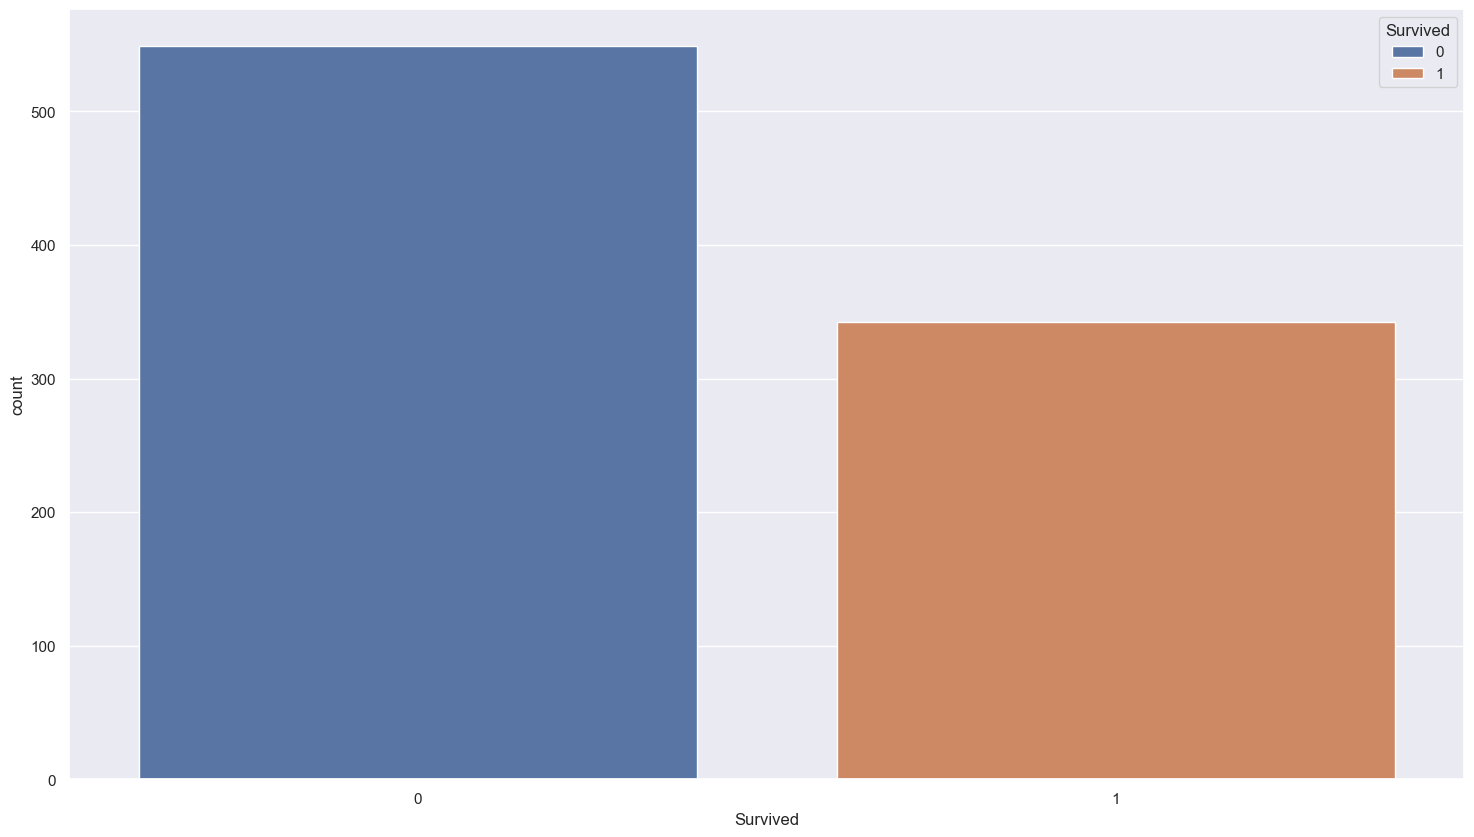

In [148]:
# Importamos seaborn para graficar cuantas personas sobrevivieron.
import seaborn as sb
sb.countplot(x='Survived', data=datos, hue='Survived')

<Axes: xlabel='Survived', ylabel='count'>

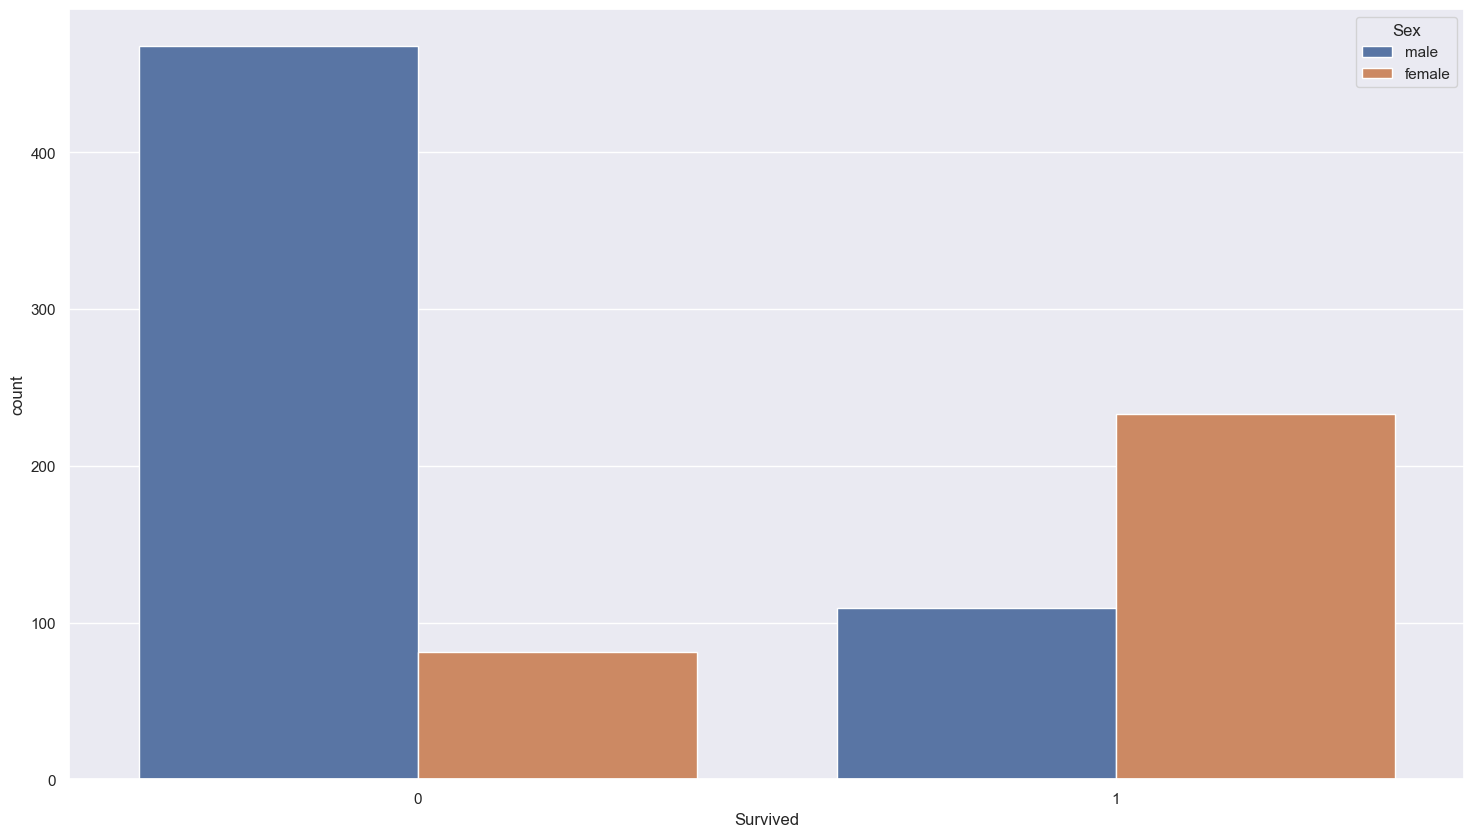

In [149]:
#Luego de graficar la superveniencia y la mortalidad, utilizamos la característica de sexo para separar por genero por medio de hue:””.
import seaborn as sb
sb.countplot(x='Survived', data=datos ,hue='Sex')

In [150]:
# Para verificar si hay datos vacíos o nulos usamos la función .isna()
# Como isna() solo mostrara datos booleanos, usamos además el método sum() después de isna,
# así datos.isna().sum()
datos.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [151]:
# Para verificar solo las columnas que tienen el inconveniente, creamos la matriz en datos [[]] y agregamos los nombres de cada columna.
datos[["Age","Embarked","Cabin"]].isna().sum()

Age         177
Embarked      2
Cabin       687
dtype: int64

In [152]:
# Ya Sabemos que hay (177) datos de edad que no registran, por tal motivo será mejor 
# llenarlos con un promedio, hay (2) filas con Embarked vacías, también lo mejor será 
# eliminar del todo estos 2 registros y, por último, la columna de cabina puede que la descartemos 
#  y puede que no o, mejor dicho, es mejor volverla un booleano para que podamos utilizarla.
datos["CabinaTF"] = datos["Cabin"].notna().astype(int)
datos

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinaTF
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [153]:
# Ahora desde este punto, realizaremos la verificación de otro conjunto de datos, 
# partiendo de la primicia de que hay una variable a tener en cuenta, 
# esta se da relacionando el estrato social de cada persona 
# (su clase social, para saber si es de primera segunda o tercera clase por medio 
# de su pase de abordaje: Pclass= 1 o 2 o 3), la columna "Cabin", fue sustituida por "CabinaTF"
datosTF = datos.drop(["Cabin"],axis=1)
datosTF

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,CabinaTF
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1


In [154]:
# De momento utilizaremos una la función isnull() más la función sum(), 
# para que nos regrese los datos vacíos nuevamente y realizamos una comparación 
# con los datos anteriores. 
datosTF.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
CabinaTF         0
dtype: int64

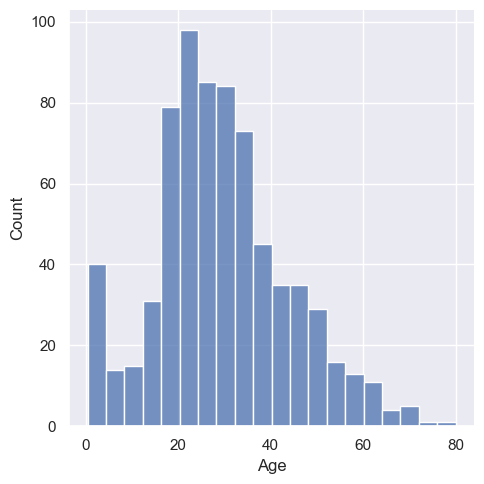

In [155]:
# También realizaremos una nueva grafica para verificar la distribución de las edades. 
# Ya que debemos rellenar los datos nulos o vacíos con los datos promedio 
# para poder utilizar la columna datosTF["Age"].
sb.displot(x="Age", data=datosTF)

In [156]:
# Utilizamos la propiedad .mean() para traer el promedio de los datos.
datosTF["Age"].mean()

29.69911764705882

In [157]:
# El proceso para llenar los datos vacios es muy sencillo,
# asi como existe dropna() para eliminar estos datos, 
# existe la funcion fillna() para llenar estos datos vacios. 
# Como esta funcion nos devuelve un nuevo set de datos,
# lo que hacemos es guardar este set en una nueva variable (datosAge).
datosAge = datosTF["Age"].fillna(datosTF["Age"].mean())
datosAge

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [158]:
# Utilizaremos esta variable (datosAge) para pasarla como argumento en fillna,
# directamente en la columna ["Age"] del dataset original que estamos utilizando (datosTF),
# al verificar los datos nuevamente veremos que
# ya se encuentran los datos nulos sobrescribimos con el promedio.
datosTF["Age"]=datosTF["Age"].fillna(datosAge)
datosTF.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
CabinaTF       0
dtype: int64

In [159]:
# De momento solo nos queda eliminar las dos filas de datos que están vacías, 
# aquí podemos volver a utilizar nuestra función amiga dropna().
datosTF = datosTF.dropna()
datosTF.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
CabinaTF       0
dtype: int64

In [160]:
# Aun debemos quitar algunas columnas irrelevantes para nuestro modelo y transformar
# las cadenas de texto de male y female en datos numéricos, 
# pues no queremos que el modelo busque algún tipo de relación por ejemplo
# con los nombres o con los ID de cada pasajero.
datosTF = datosTF.drop(["Name","PassengerId","Ticket"],axis=1)
datosTF

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinaTF
0,0,3,male,22.000000,1,0,7.2500,S,0
1,1,1,female,38.000000,1,0,71.2833,C,1
2,1,3,female,26.000000,0,0,7.9250,S,0
3,1,1,female,35.000000,1,0,53.1000,S,1
4,0,3,male,35.000000,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,0
887,1,1,female,19.000000,0,0,30.0000,S,1
888,0,3,female,29.699118,1,2,23.4500,S,0
889,1,1,male,26.000000,0,0,30.0000,C,1


In [161]:
# En esta sección de código transformaremos male o fémale en datos lógicos. 
# Utilizar get_dummies para realizar la codificación one-hot en la columna 'Sex'

datosTF = pd.get_dummies(datosTF, columns=['Sex'], drop_first=True)
datosTF

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,CabinaTF,Sex_male
0,0,3,22.000000,1,0,7.2500,S,0,True
1,1,1,38.000000,1,0,71.2833,C,1,False
2,1,3,26.000000,0,0,7.9250,S,0,False
3,1,1,35.000000,1,0,53.1000,S,1,False
4,0,3,35.000000,0,0,8.0500,S,0,True
...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,S,0,True
887,1,1,19.000000,0,0,30.0000,S,1,False
888,0,3,29.699118,1,2,23.4500,S,0,False
889,1,1,26.000000,0,0,30.0000,C,1,True


In [162]:
# Cambiamos nuestros datos true o false por 1 y 0, y solo nos faltaría 
# verificar que tan relevante es la columna (Embarked).
datosTF['Sex_male'] = datosTF['Sex_male'].astype(int)
datosTF

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,CabinaTF,Sex_male
0,0,3,22.000000,1,0,7.2500,S,0,1
1,1,1,38.000000,1,0,71.2833,C,1,0
2,1,3,26.000000,0,0,7.9250,S,0,0
3,1,1,35.000000,1,0,53.1000,S,1,0
4,0,3,35.000000,0,0,8.0500,S,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,S,0,1
887,1,1,19.000000,0,0,30.0000,S,1,0
888,0,3,29.699118,1,2,23.4500,S,0,0
889,1,1,26.000000,0,0,30.0000,C,1,1


<Axes: xlabel='Survived', ylabel='count'>

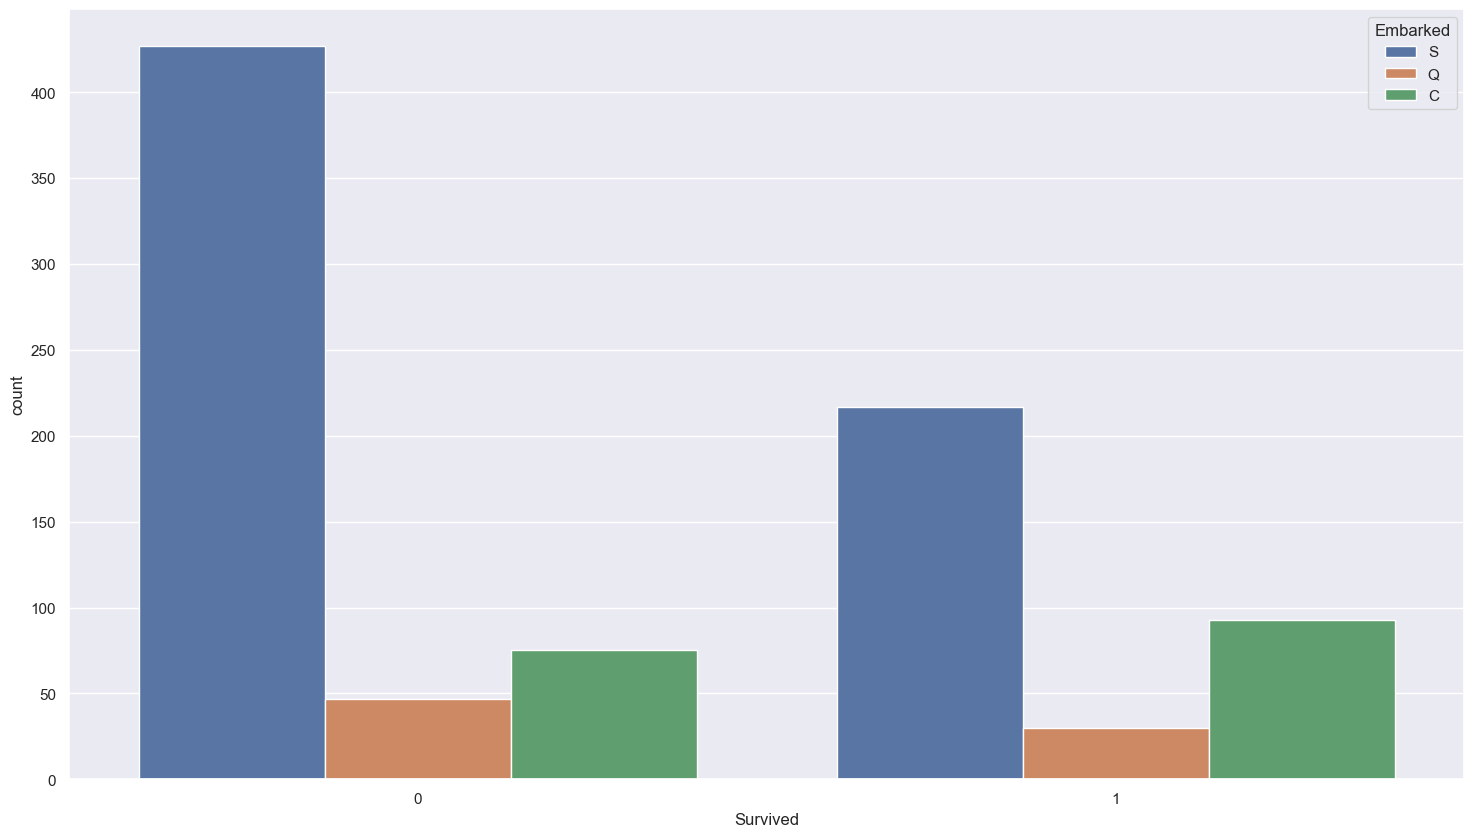

In [163]:
# Como la información se encuentra baste balanceada, y quizás no 
# podamos encontrar una relación donde la gente más adinerada o 
# con pase de primera clase abordo, realizaremos 2 histogramas.
sb.countplot(x="Survived",data=datosTF,hue="Embarked")

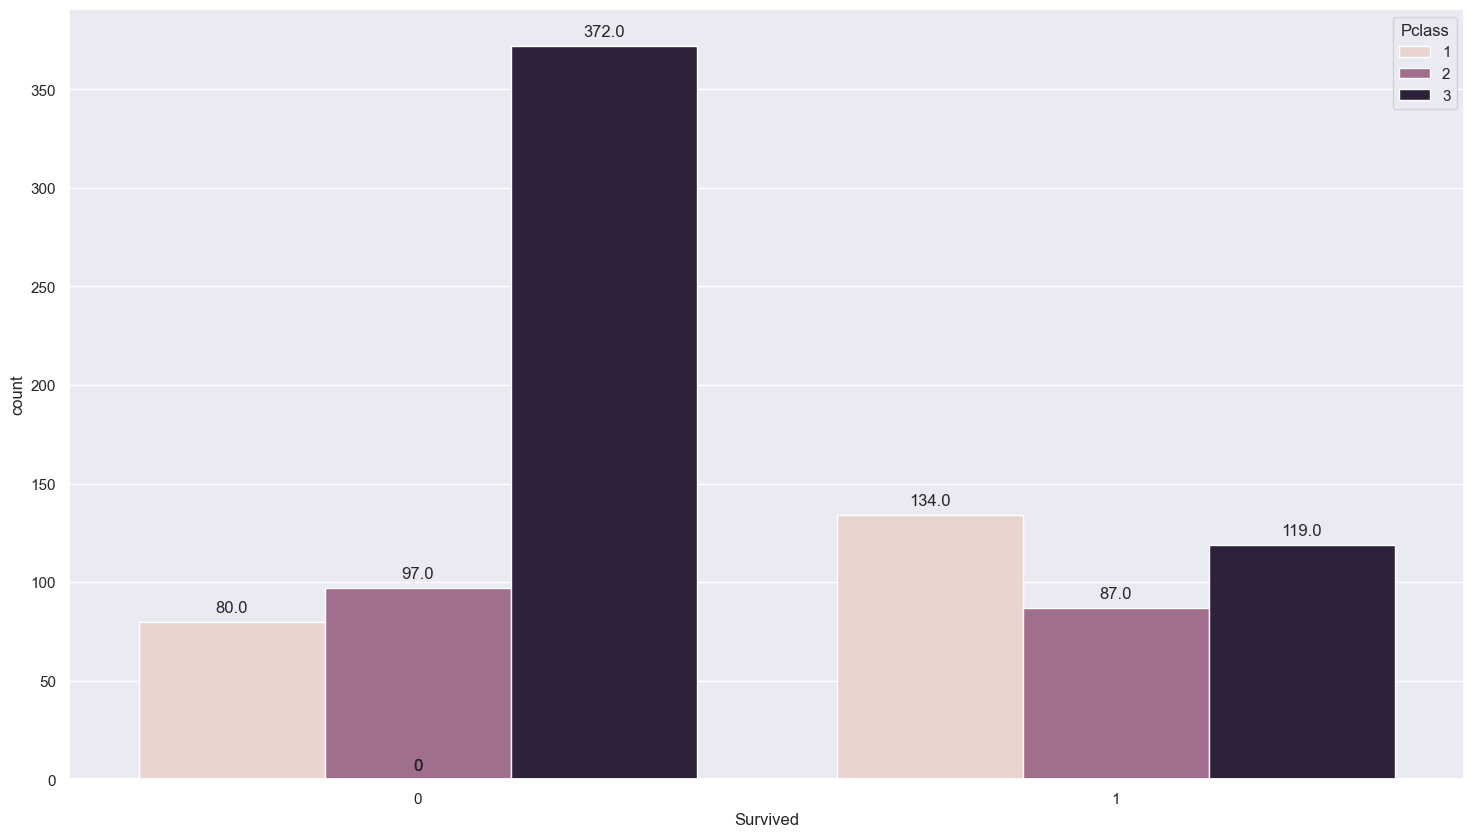

In [164]:
# Creamos un histograma comparativo donde podemos verificar las muertes de las personas
# con relación a la clase de su pase de abordaje.
ax = sb.countplot(x="Survived", data=datosTF, hue="Pclass")
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

In [165]:
# Procederemos a usar los dumies para poder utilizarlos en nuestro modelo.
enbarketDumies = pd.get_dummies(datosTF["Embarked"], dtype = int)
enbarketDumies

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [166]:
# Ahora eliminaremos la fila Embarket de nuestro set de datos final.
datosTF = datosTF.drop(columns=['Embarked'])
datosTF

,Survived,Pclass,Age,SibSp,Parch,Fare,CabinaTF,Sex_male
0,0,3,22.000000,1,0,7.2500,0,1
1,1,1,38.000000,1,0,71.2833,1,0
2,1,3,26.000000,0,0,7.9250,0,0
3,1,1,35.000000,1,0,53.1000,1,0
4,0,3,35.000000,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,0,1
887,1,1,19.000000,0,0,30.0000,1,0
888,0,3,29.699118,1,2,23.4500,0,0
889,1,1,26.000000,0,0,30.0000,1,1


In [167]:
# Por ultimo y para dejar nuestro set de datos totalmente listo para el entrenamiento del modelo,
# unimos los dumies.
datosTF = datosTF.join(enbarketDumies)
datosTF

,Survived,Pclass,Age,SibSp,Parch,Fare,CabinaTF,Sex_male,C,Q,S
0,0,3,22.000000,1,0,7.2500,0,1,0,0,1
1,1,1,38.000000,1,0,71.2833,1,0,1,0,0
2,1,3,26.000000,0,0,7.9250,0,0,0,0,1
3,1,1,35.000000,1,0,53.1000,1,0,0,0,1
4,0,3,35.000000,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,0,1,0,0,1
887,1,1,19.000000,0,0,30.0000,1,0,0,0,1
888,0,3,29.699118,1,2,23.4500,0,0,0,0,1
889,1,1,26.000000,0,0,30.0000,1,1,1,0,0


<Axes: >

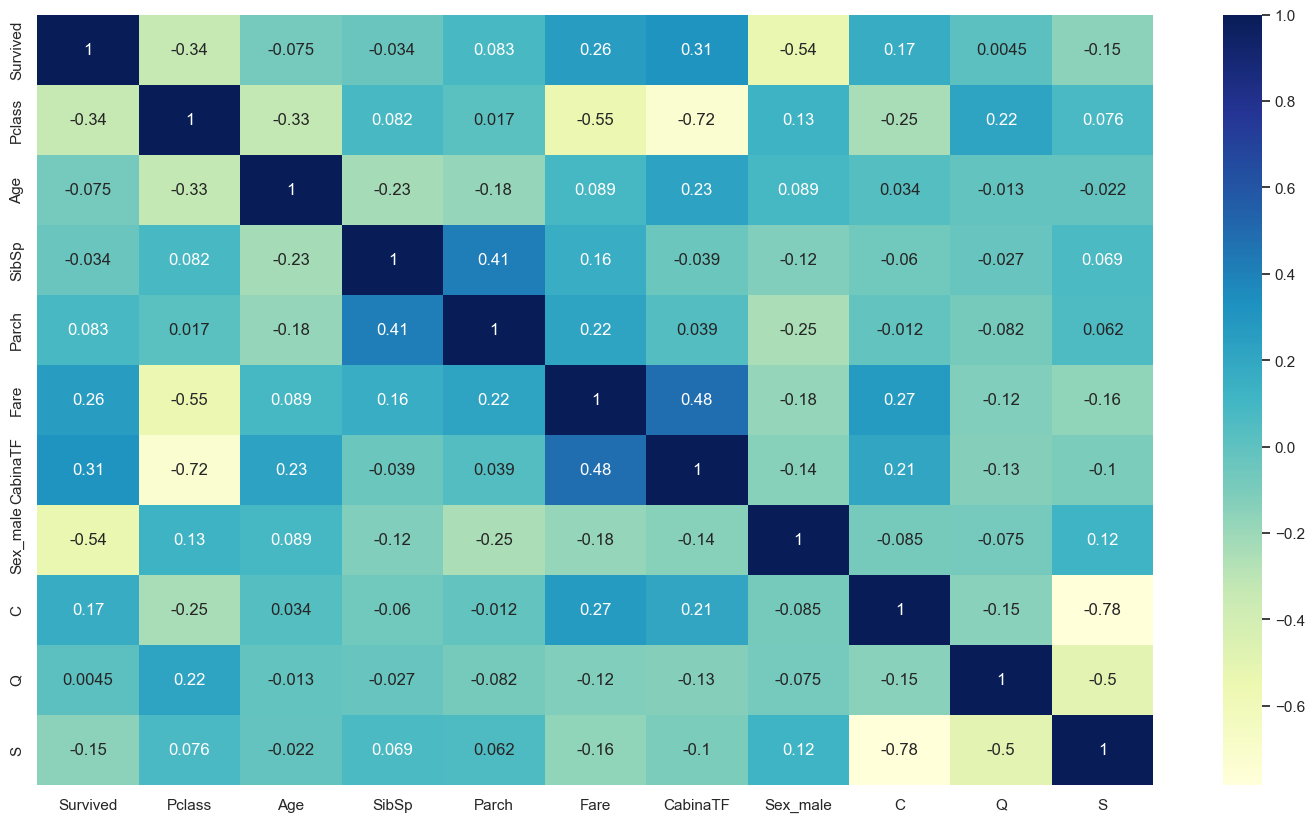

In [168]:
# En este momento podemos crear un heatmap para verificar la correlación de los datos.
sb.set(rc={"figure.figsize":(18,10)})
sb.heatmap(datosTF.corr(), annot=True, cmap="YlGnBu")

In [169]:
# En este espacio, separaremos los datos.
# En el eje X, dejamos todos los datos eliminando la columna ["Survived"].
# En el eje Y, solamente dejamos la columna ["Survived"].
x=datosTF.drop(["Survived"], axis=1)
y=datosTF["Survived"]

In [173]:
# Desde Sklearn importamos train_test_split para dividir los datos en 2
# Los datos que serán para entrenar el modelo y los datos para realizar la prueba.
from sklearn.model_selection import train_test_split
X_ent, X_pru, y_ent, y_pru = train_test_split(x, y, test_size=0.2)

In [171]:
x

,Pclass,Age,SibSp,Parch,Fare,CabinaTF,Sex_male,C,Q,S
0,3,22.000000,1,0,7.2500,0,1,0,0,1
1,1,38.000000,1,0,71.2833,1,0,1,0,0
2,3,26.000000,0,0,7.9250,0,0,0,0,1
3,1,35.000000,1,0,53.1000,1,0,0,0,1
4,3,35.000000,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,0,1,0,0,1
887,1,19.000000,0,0,30.0000,1,0,0,0,1
888,3,29.699118,1,2,23.4500,0,0,0,0,1
889,1,26.000000,0,0,30.0000,1,1,1,0,0


In [172]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

                                         Continuación del ejercicio práctico árbol de decisión.

In [178]:
# Realizaremos uso del árbol de decisiones de sklearn para alcanzar una mejora significativa en nuestro anterior modelo.
from sklearn.tree import DecisionTreeClassifier
model00 = DecisionTreeClassifier(max_depth=50)
model00.fit(X_ent,y_ent)
predicciones00 = model00.predict(X_pru)

In [179]:
# Revisemos como le fue al entrenamiento del modelo de árbol de decisiones.
from sklearn.metrics import accuracy_score
accuracy_score(y_pru, predicciones00)

0.7696629213483146

In [211]:
# Como podemos ver en el accuracy_score parece haberle ido peor que en la regresión logística,
# pero esto puede deberse a que no sabemos con exactitud que profundidad necesita el modelo, entonces...
# iteremos un ciclo for y verifiquemos el comportamiento del modelo de acuerdo a su profundidad.
# Guardaremos en una lista vacía los resultados con el score de cada iteración para graficarlos.
resultadoGrafica = []
from sklearn.tree import DecisionTreeClassifier
for i in range(1,20):
    model01 = DecisionTreeClassifier(max_depth=i)
    model01.fit(X_ent,y_ent)
    predicciones1 = model01.predict(X_pru)
    exactitud = accuracy_score(y_pru, predicciones1)
    resultadoGrafica.append(exactitud)
    print(exactitud)

0.7865168539325843
0.7865168539325843
0.8258426966292135
0.8314606741573034
0.8089887640449438
0.7696629213483146
0.7696629213483146
0.8089887640449438
0.7865168539325843
0.7808988764044944
0.7865168539325843
0.7808988764044944
0.7752808988764045
0.7808988764044944
0.7752808988764045
0.7696629213483146
0.7752808988764045
0.7640449438202247
0.7696629213483146


<Axes: >

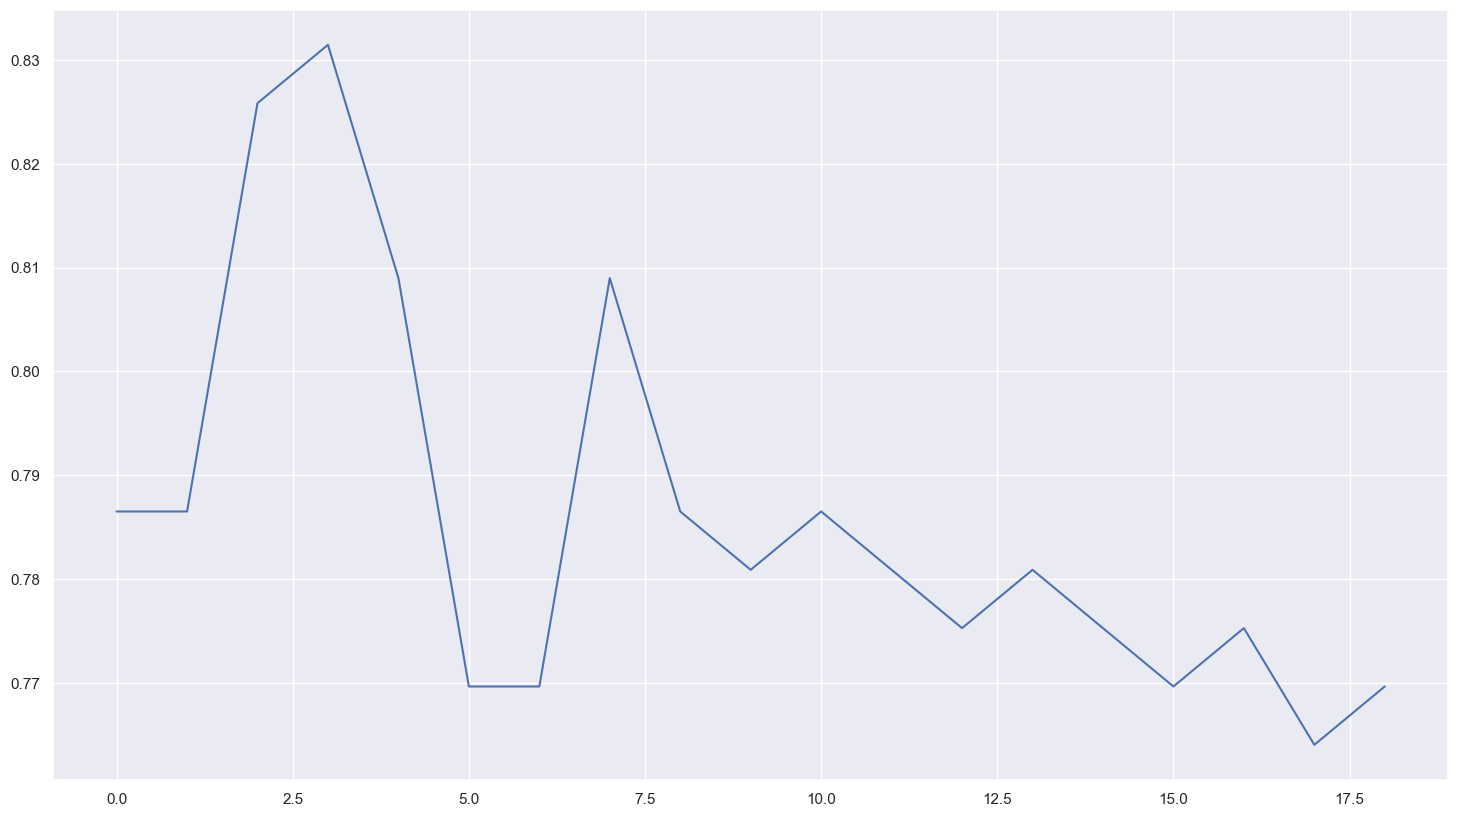

In [212]:
# En este punto los resultados se fueron agregando de a uno a la lista resultadoGrafica[]
# Procedamos a realizar un gráfico de línea para verificar su comportamiento.
sb.lineplot(data=resultadoGrafica)

In [213]:
# Es claro y después de iterar varias veces el ciclo for,
# que el modelo está alcanzando su mejor rendimiento en su cuarta iteración.
modelF = DecisionTreeClassifier(max_depth=4)
modelF.fit(X_ent,y_ent)
prediccionesF = modelF.predict(X_pru)
exactitudF = accuracy_score(y_pru, prediccionesF)
resultadoGrafica.append(exactitudF)
print(exactitudF)

0.8314606741573034


In [215]:
# Después de tener el modelo ideal, podemos realizar la verificación de las métricas.
from sklearn.metrics import classification_report
print(classification_report(y_pru, prediccionesF))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87       111
           1       0.78      0.76      0.77        67

    accuracy                           0.83       178
   macro avg       0.82      0.82      0.82       178
weighted avg       0.83      0.83      0.83       178


In [216]:
# verifiquemos la matriz de confusión, en comparación del modelo de regresión logística.
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_pru, prediccionesF), columns=['Pre : NO', 'Pre : Si'], index=['Real : NO', 'Real : Si'])


,Pre : NO,Pre : Si
Real : NO,97,14
Real : Si,16,51


[Text(0.5446428571428571, 0.9, 'Sex_male <= 0.5\n0.473\n711\n[438, 273]\nMurió'),
 Text(0.2857142857142857, 0.7, 'Pclass <= 2.5\n0.374\n241\n[60, 181]\nVivió'),
 Text(0.14285714285714285, 0.5, 'Fare <= 26.125\n0.076\n126\n[5, 121]\nVivió'),
 Text(0.07142857142857142, 0.3, 'Age <= 37.0\n0.153\n48\n[4, 44]\nVivió'),
 Text(0.03571428571428571, 0.1, '0.105\n36\n[2, 34]\nVivió'),
 Text(0.10714285714285714, 0.1, '0.278\n12\n[2, 10]\nVivió'),
 Text(0.21428571428571427, 0.3, 'Fare <= 149.035\n0.025\n78\n[1, 77]\nVivió'),
 Text(0.17857142857142858, 0.1, '0.0\n65\n[0, 65]\nVivió'),
 Text(0.25, 0.1, '0.142\n13\n[1, 12]\nVivió'),
 Text(0.42857142857142855, 0.5, 'Fare <= 22.904\n0.499\n115\n[55, 60]\nVivió'),
 Text(0.35714285714285715, 0.3, 'Fare <= 7.763\n0.481\n97\n[39, 58]\nVivió'),
 Text(0.32142857142857145, 0.1, '0.278\n24\n[4, 20]\nVivió'),
 Text(0.39285714285714285, 0.1, '0.499\n73\n[35, 38]\nVivió'),
 Text(0.5, 0.3, 'Parch <= 0.5\n0.198\n18\n[16, 2]\nMurió'),
 Text(0.4642857142857143, 0.1, 

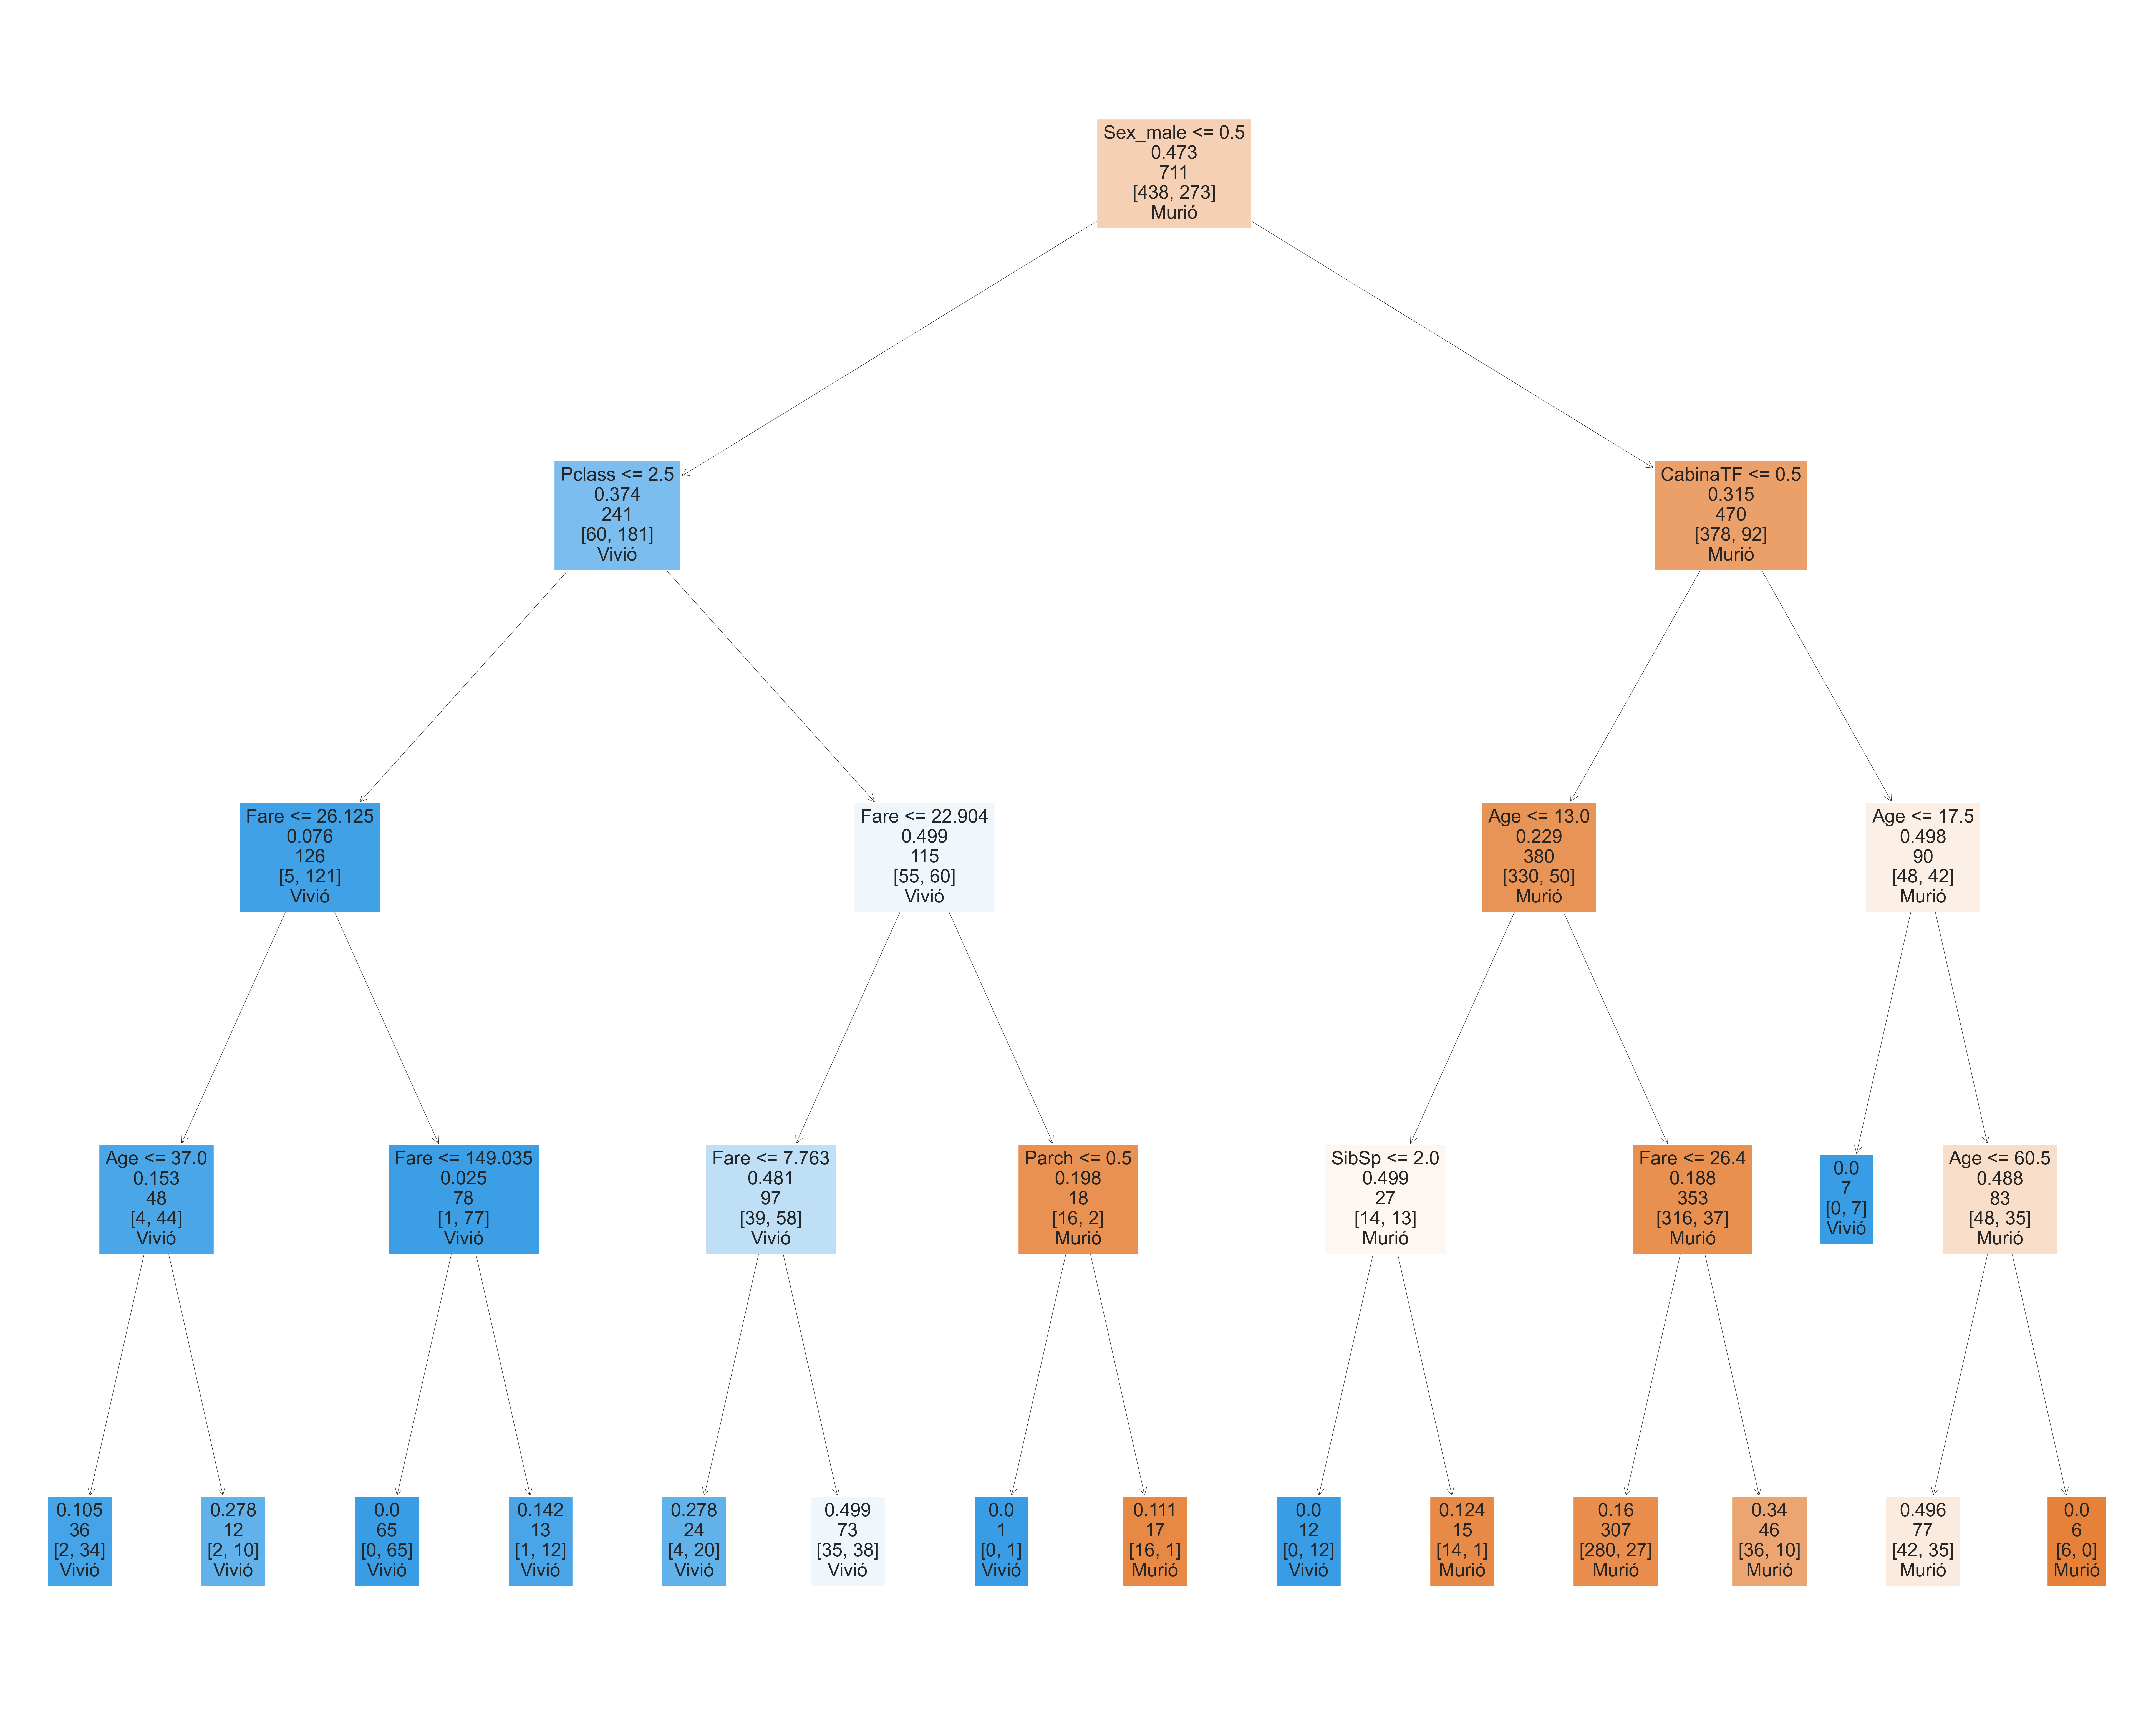

In [217]:
# ahora una de las ventajas del árbol de decisiones es que podemos graficarlo.
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(100,80))
plot_tree(
    modelF,
    feature_names=X_ent.columns,
    class_names=["Murió", "Vivió"],
    filled=True, label="none"
)

                                           Conclusión
                                           
Podemos ver que el árbol de decisiones nos permite una mayor oportunidad de clasificar la información con más exactitud que la regresión logística, y con esta grafica es muy sencillo entender el paso a paso que realiza el modelo para ajustar sus resultados.

Bien dicen que una imagen dice que más que mil palabras, por tal motivo no hay mucho que explicar solamente viendo la información que nos muestra el árbol de decisiones.
   